# Temporal and Spatial DataMining

## Exercise_05_Similarity - Intro

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
from matplotlib import cm
plt.style.use('ggplot')

In [2]:
class ExampleClass:
    def __init__(self):
        print('I run when we create an object.')
        # Saving a variable with `self.var = var` enables other methods in a class
        # to have access to that variable.
        self.variable = 'I am a variable.'       
        
    def __call__(self):
        print('I run when the object is called')
        
    def some_method(self):
        print('The variable can be accessed in this method:', self.variable)
        print('I am a method.')
        
obj = ExampleClass() # Create object out of class, calls the __init__ method
obj()                # Call the object, runs the __call__ method
obj.some_method()    # Call some_method from the object.
obj.variable         # Get the value of the variable defined in the object.

I run when we create an object.
I run when the object is called
The variable can be accessed in this method: I am a variable.
I am a method.


'I am a variable.'

### Task 1: Distance calculation

The euclidean distance of two vectors is defined as:
$$d(\mathbf{X}, \mathbf{Y})=\|\mathbf{X}-\mathbf{Y}\|_{2}=\sqrt{\left(x_{1}-y_{1}\right)^{2}+\cdots+\left(x_{n}-y_{n}\right)^{2}}=\sqrt{\sum_{i=1}^{n}\left(x_{i}-y_{i}\right)^{2}}$$


The euclidean distance is a special form of the <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm">p-norm</a>:

\begin{align}
D_{p}(\mathbf{X}, \mathbf{Y}) = (\sum_{i=1}^{N}|x_i-y_i|^{p})^{\frac{1}{p}}
\end{align}

**a)** Create the class `PNorm` that gets the value of $p$ as an initialization parameter. The `__call__` method should have two vectors as input arguments and return their distance.

In [3]:
class PNorm:
    def __init__(self, p):
        """Initialization of PNorm."""
### SOLUTION ###
        self.p = p
### ENDSOLUTION ###
    
    def __call__(self, u, v):
        """Call method that determines the distance between u and v."""
### SOLUTION ###
        return np.sum(np.abs(u - v)**self.p)**(1/self.p)
### ENDSOLUTION ###

**b)** Calculate the Manhattan distance (p=1) and Euclid distance (p=2) between X1 and X2:

In [4]:
np.random.seed(0)
X1 = np.random.rand(10)
X2 = np.random.rand(10)

In [5]:
manh_dist = PNorm(p=1)
euc_norm = PNorm(p=2)

print("Manhattan distance between X1 and X2:", manh_dist(X1, X2))
print("Euclidean distance between X1 and X2:", euc_norm(X1, X2))

Manhattan distance between X1 and X2: 2.9046204135831926
Euclidean distance between X1 and X2: 1.0607908079366692


The [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) of two vectors $\mathbf{u}$, $\mathbf{v}$ given a covariance matrix $\mathbf{S}$ is given by:
$$\Delta(\mathbf{u}, \mathbf{v}) =  \sqrt{(\mathbf{u}-\mathbf{v})^T\mathbf{S}^{-1}(\mathbf{u}-\mathbf{v})}$$

A covariance matrix is a symmetric, positive semidefinite matrix. Use the provided matrix S:
$S=\begin{pmatrix}1 & 0.5 \\ 0.5 & 1 \end{pmatrix}$

**c)** Implement a class `Mahalanobis` that gets the matrix of $\mathbf{S}$ as an initialization parameter. The call method should get two vectors and return their distance:

In [6]:
### SOLUTION ###

class Mahalanobis():
    def __init__(self, S):
        self.S = np.array(S)
        
    def __call__(self, u, v):
        x = u - v
        return np.sqrt(x @ np.linalg.inv(self.S) @ x)
    
### ENDSOLUTION ###

In [7]:
S = [[1, .5], [.5, 1]]

a, b = np.array([1, 2]), np.array([2, 1])
mahalanobis_dist = Mahalanobis(S=S)
mahalanobis_dist(a, b) # should return 2

2.0

The scaled Euclidean distance (based on the matrix norm) is given by: 

\begin{align}
D_{M}(\mathbf{x}, \mathbf{y}) = \sqrt{(\mathbf{x}-\mathbf{y})^{T}\mathbf{M}(\mathbf{x}-\mathbf{y}))}
\end{align}

with the Matrix norm:

\begin{align}
\mathbf{M} = \left(\frac{1}{N-1}\sum_{k=1}^{N}(x_k-\mu)(x_k-\mu)^{T}\right)^{-1}
\end{align}

and the mean value $$\mu = \frac{1}{N}\sum_{k=1}^{N}x_k$$. 

**c)** Implement scaled Euclidean distance in python and calculate the distance $D_{M}(\mathbf{x}_1, \mathbf{x}_2)$:

>with $x_k$ is the $k_{th}$ sample, and $N=2$.

>consider using the right dimensions

$$\mathbf{x}_1, \mathbf{x}_2 \in \mathbb{R}^n \text{ , } \mathbf{M} \in \mathbb{R}^{n \times n} \text{ and } n=10$$

In [8]:
X = np.matrix(np.concatenate((X1.reshape(1,-1), X2.reshape(1,-1)),axis=0)).T
X

matrix([[0.5488135 , 0.79172504],
        [0.71518937, 0.52889492],
        [0.60276338, 0.56804456],
        [0.54488318, 0.92559664],
        [0.4236548 , 0.07103606],
        [0.64589411, 0.0871293 ],
        [0.43758721, 0.0202184 ],
        [0.891773  , 0.83261985],
        [0.96366276, 0.77815675],
        [0.38344152, 0.87001215]])

In [9]:
class scaled_Euclid_distance():
    
    def __init__(self, X):
        """ initialization using all samples """
        self.M = self.calculate_M(X)
    
    def calculate_M(self, X):
        
        # pass
    
    ### SOLUTION ###
        
        mu = np.mean(X, axis=1).reshape(-1, 1)
        # print(mu.shape)
        M = np.sum([(X[:, i] - mu)@(X[:, i] - mu).T for i in range(X.shape[1])], axis=0)
        return np.linalg.inv(M)

    ### ENDSOLUTION ###
        
    def __call__(self, X, Y):
        
        # pass
    
    ### SOLUTION ###
        
        # X = X
        # Y = Y
        
        return np.sqrt((X-Y).T@self.M@(X-Y))
    
    ### ENDSOLUTION ###

In [10]:
X = np.concatenate((X1.reshape(1,-1), X2.reshape(1,-1)),axis=0).T
# print(X)
scl_euc = scaled_Euclid_distance(X)

In [11]:
print("scaled Euclid distance:", scl_euc(X1, X2))

scaled Euclid distance: nan


/var/folders/hk/dwphr0p14vn00wrnlw8bxjpw0000gn/T/ipykernel_4243/1394637226.py:29: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((X-Y).T@self.M@(X-Y))


**d)** Implement following distance measure:

*Cosine distance:* Normalized standard scalar product of two vectors (cosine of the angle):
	
$$d(\mathbf{x},\mathbf{y}) := \frac{\langle \mathbf{x} \vert \mathbf{y} \rangle}{||\mathbf{x}||\cdot||\mathbf{y}||}$$
Note: another notation for $\langle \mathbf{x} \vert \mathbf{y} \rangle$ is $\mathbf{x}^{\textrm{T}} \mathbf{y}$.

In [12]:
class CosineDistance():

    def __init__(self):
    ### SOLUTION ###
    
    ### ENDSOLUTION ###
        pass

    def __call__(self, x, y):
        ### SOLUTION ###
        return (x@y)/(norm(x)*norm(y))
        ### ENDSOLUTION ###

In [13]:
cd = CosineDistance()

cd(X1, X2)

0.8642101667343084

### Task 2: Plotting
Plotting is an essential tool for data visualization. 

> Use the provided `plot_distances` function to visualize your previously implemented distance functions.
> The `plot_distance` function takes an arbitrary distance function as input, which itself has two input arguments.

In [14]:
def plot_distances(distf, base=np.array([0,0])):
    """
    Plot level contours of given distance function **distf** around the development point **base**

    Parameters:
    ===========
    distf - (x,y) -> d A function taking two arrays and returning a positive distance measure.

    base - base point to develop the contour lines around.
    """
    X, Y = np.mgrid[-3:3:0.1, -3:3:0.1]
    Z = np.zeros_like(X)

    for i,_ in enumerate(X):
        for j,_ in enumerate(Y):
            x = X[i,j]
            y = Y[i,j]
            pt = np.asarray([x,y])
            Z[i,j] = distf(pt, base)

    levels = np.arange(0,6,0.25)

    CS = plt.contour(X, Y, Z, levels=levels)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.grid(True)

**a)** For the p-norm try different values for the value of `p` and plot the distance using the method `plot_distance`.

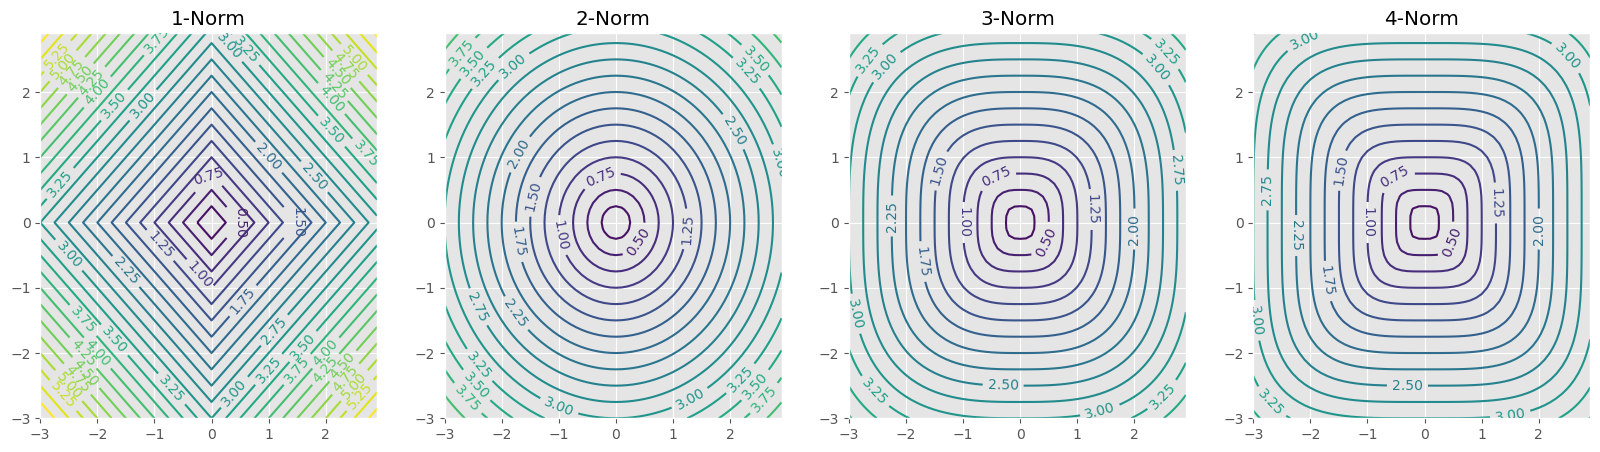

In [15]:
### SOLUTION ###

plt.figure(figsize=(20, 5))
for i in range(1, 5):
    pnorm = PNorm(i)
    plt.subplot(1, 4, i)
    plt.title('{}-Norm'.format(i))
    plot_distances(pnorm)
plt.show()

### ENDSOLUTION ###

**b)** For the Mahalanobis distance try different values for the covariance matrix `S` and plot the distance using the method `plot_distance`. 

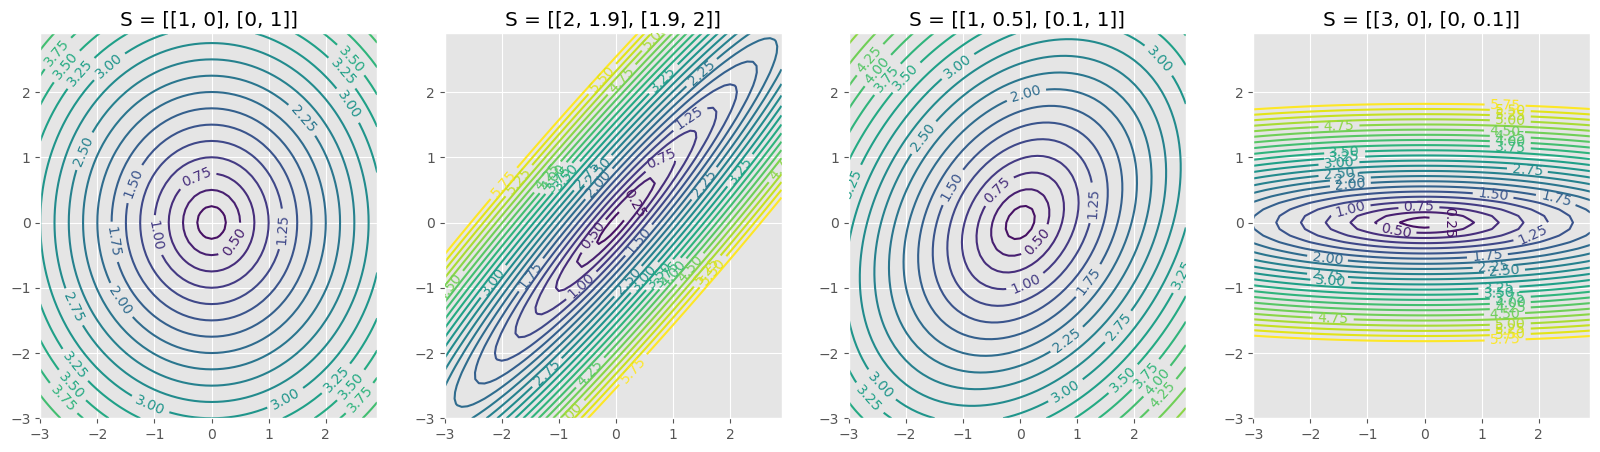

In [16]:
### SOLUTION ###

all_S = [
    [[1, 0], [0, 1]],
    [[2, 1.9], [1.9, 2]],
    [[1, .5], [.1, 1]],
    [[3, 0], [0, .1]],
]
plt.figure(figsize=(20, 5))
for i, S in enumerate(all_S):
    plt.subplot(1, 4, i+1)
    mahalanobis_dist = Mahalanobis(S)
    plt.title('S = {}'.format(S))
    plot_distances(mahalanobis_dist)
plt.show()

### ENDSOLUTION ###